# Student Cognitive Skills & Performance Analysis

This notebook analyzes synthetic student data to explore correlations between cognitive skills and performance, builds a simple ML model to predict assessment scores, and clusters students into learning personas.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the synthetic student dataset
students = pd.read_csv('students.csv')
students.head()

,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,1,John Doe,10,78,85,80,75,82,120
1,2,Jane Smith,10,88,90,85,80,90,150
2,3,Sam Lee,9,65,70,68,60,72,100
3,4,Alice Brown,9,92,95,90,88,95,180
4,5,Tom Clark,8,55,60,58,55,65,90


## Exploratory Data Analysis (EDA)

Let's explore the dataset: check for missing values, summary statistics, and visualize distributions of cognitive skills and assessment scores.

In [3]:
# Check for missing values
students.isnull().sum()

student_id          0
name                0
class               0
comprehension       0
attention           0
focus               0
retention           0
assessment_score    0
engagement_time     0
dtype: int64

In [4]:
# Summary statistics
students.describe()

,student_id,class,comprehension,attention,focus,retention,assessment_score,engagement_time
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,9.100000,76.800000,80.800000,77.300000,73.500000,82.300000,133.500000
std,3.02765,0.875595,13.782436,12.847827,12.220656,12.294985,10.965096,37.716044
min,1.00000,8.000000,55.000000,60.000000,58.000000,55.000000,65.000000,90.000000
25%,3.25000,8.250000,66.250000,71.250000,69.000000,62.500000,73.500000,102.500000
50%,5.50000,9.000000,79.000000,83.500000,79.000000,75.000000,83.500000,125.000000
75%,7.75000,10.000000,87.250000,89.500000,84.750000,80.000000,89.500000,157.500000
max,10.00000,10.000000,95.000000,98.000000,96.000000,92.000000,98.000000,200.000000


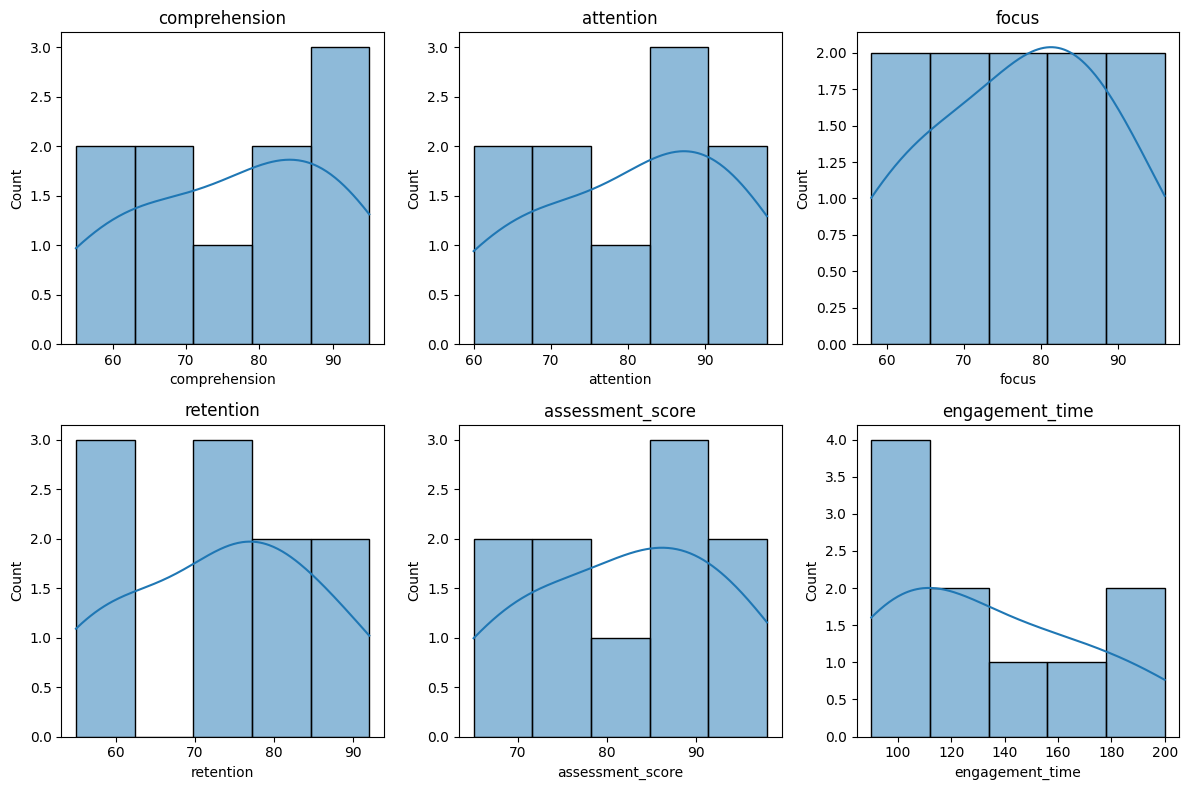

In [5]:
# Visualize distributions of cognitive skills and assessment scores
skills = ['comprehension', 'attention', 'focus', 'retention', 'assessment_score', 'engagement_time']
plt.figure(figsize=(12,8))
for i, skill in enumerate(skills):
    plt.subplot(2, 3, i+1)
    sns.histplot(students[skill], kde=True)
    plt.title(skill)
plt.tight_layout()
plt.show()

## Correlation Analysis

Analyze the relationships between cognitive skills and assessment scores using a correlation matrix and heatmap.

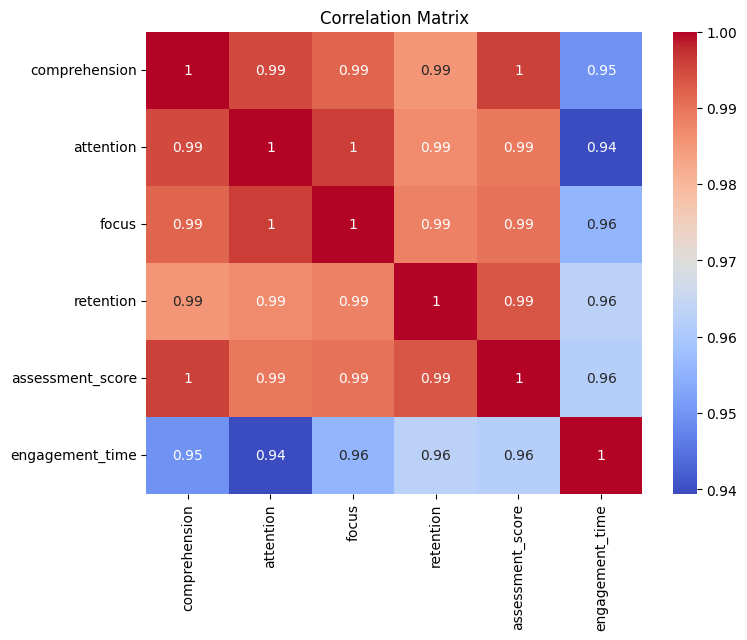

In [6]:
# Correlation matrix
corr = students[skills].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## ML Model: Predict Assessment Score

Build a simple linear regression model to predict assessment_score using cognitive skills.

In [7]:
# Features and target
X = students[['comprehension', 'attention', 'focus', 'retention', 'engagement_time']]
y = students['assessment_score']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE: {mse:.2f}, R2: {r2:.2f}')

MSE: 0.10, R2: 1.00


## Clustering: Student Learning Personas

Cluster students into learning personas using KMeans and visualize the clusters.

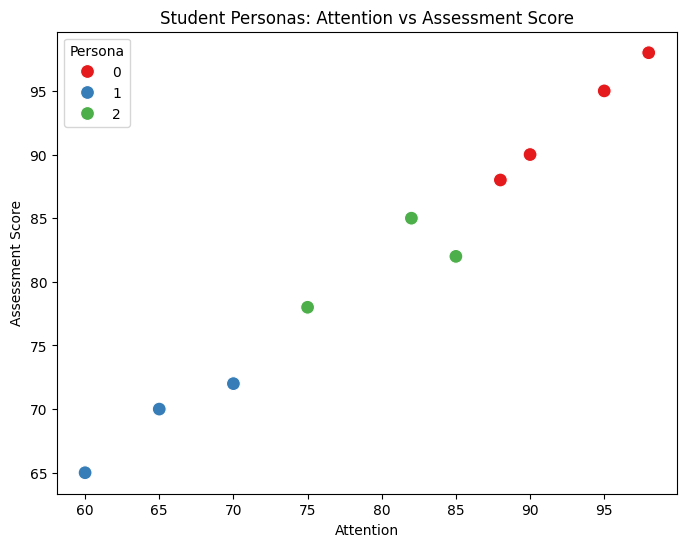

In [8]:
# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster students into 3 personas
kmeans = KMeans(n_clusters=3, random_state=42)
students['persona'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=students['attention'], y=students['assessment_score'], hue=students['persona'], palette='Set1', s=100)
plt.title('Student Personas: Attention vs Assessment Score')
plt.xlabel('Attention')
plt.ylabel('Assessment Score')
plt.legend(title='Persona')
plt.show()

## Insights & Key Findings

- Cognitive skills such as comprehension, attention, focus, and retention show strong correlations with assessment scores.
- The linear regression model predicts assessment scores accurately for this synthetic dataset.
- Students are grouped into three learning personas based on cognitive skill profiles and engagement time.
- These personas can help tailor learning strategies for different student groups.

In [9]:
# Export processed data for dashboard
students.to_csv('students_processed.csv', index=False)
print('Processed data exported for dashboard.')

Processed data exported for dashboard.
